In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from set_rcParams import set_rcParams
set_rcParams()
import astropy.units as u
import astropy.constants as c
import os
import random
from random import randint



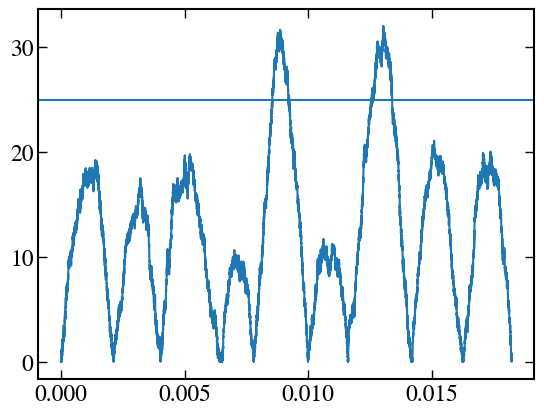

In [431]:
data = pd.read_csv("heating-data-all-particles-eps-real/LAGRANGE/FIRST/h-lambda-0.5/trial-0.csv")

time = data["time"][1:]
energy = data["mean_electron_energy"][1:].to_numpy()
energy_increase = 100 * abs(energy - energy[0]) / energy[0]
plt.figure()
plt.plot(time, energy_increase)
plt.axhline(25)
plt.show()

In [333]:
family = ["LAGRANGE", "HIERARCHIC", "BERNSTEIN", "HERMITE"]
order = ["SECOND"]
resolutions = [0.1, 0.5, 1, 2, 4, 6, 8, 10]
end_times = [0.05, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,0.007]

eps_0 = c.eps0
m = c.m_e
e = c.e.si
n = 5.5e7 / u.m**3
T = 1 * u.eV / c.k_B
lambda_D = np.sqrt(eps_0 * c.k_B * T / (n * e**2)).to(u.m)
omega_p = np.sqrt(n * e**2 / (m * eps_0)).to(1 / u.s)
sigma = np.sqrt(c.k_B * T / m).to((u.m / u.s))

num_elems = 10

print("lambda_D    : ", lambda_D)
print("omega_p     : ", omega_p)
print("sigma       : ", sigma)

h = lambda_D * 1
DT_opt = min(1/2 * h /lambda_D, 1) / omega_p

print(f"DT_opt      :  {DT_opt:0.4e}")

lambda_D    :  1.0023925340773543 m
omega_p     :  418381.8883149211 1 / s
sigma       :  419382.8812400624 m / s
DT_opt      :  1.1951e-06 s


In [334]:
random.seed(10)
upper_dir = "heating-data-all-particles-eps-real"

if not os.path.exists(upper_dir):
  os.mkdir(upper_dir)

for fam in family:
  family_dir = f"{upper_dir:s}/{fam:s}"
  if not os.path.exists(family_dir):
    os.mkdir(family_dir)

  if fam == "LAGRANGE":
    order = ["FRIST", "SECOND"]
  else:
    order = ["SECOND"]
    elem_type = "EDGE3"

  for o in order:
    if fam == "HERMITE":
      o = "THIRD"
      elem_type = "EDGE3"
    else:
      if o == "FIRST":
        elem_type = "EDGE2"
      else:
        elem_type = "EDGE3"

    order_dir = f"{family_dir:s}/{o:s}"
    if not os.path.exists(order_dir):
      os.mkdir(order_dir)

    for i, params in enumerate(zip(end_times, resolutions)):
      end_time, r = params
      res_dir = f"{order_dir:s}/h-lambda-{r:0.1f}"

      if not os.path.exists(res_dir):
        os.mkdir(res_dir)

      h = lambda_D * r
      DT_opt = min(1/2 * h /lambda_D, 1) / omega_p

      x_max = h * num_elems
      seed1 = randint(0, 10000)
      seed2 = randint(0, 10000)

      data_file = f"{res_dir:s}/trial-{i:d}"

      a = [f"Mesh/gmg/xmax={x_max.value:0.4e}", f"Distributions/boltz/standard_deviation={sigma.value:0.4e}", f"UserObjects/electrons/seed={seed1:d}", f"UserObjects/ions/seed={seed2:d}", f"Executioner/dt={DT_opt.value:0.4e}", f"Executioner/end_time={end_time:0.4e}",f"Outputs/file_base/{data_file:s}"]
      print(a)




      # print(DT_opt)


['Mesh/gmg/xmax=1.0024e+00', 'Distributions/boltz/standard_deviation=4.1938e+05', 'UserObjects/electrons/seed=9361', 'UserObjects/ions/seed=533', 'Executioner/dt=1.1951e-07', 'Executioner/end_time=5.0000e-02', 'Outputs/file_base/heating-data-all-particles-eps-real/LAGRANGE/FRIST/h-lambda-0.1/trial-0']
['Mesh/gmg/xmax=5.0120e+00', 'Distributions/boltz/standard_deviation=4.1938e+05', 'UserObjects/electrons/seed=7026', 'UserObjects/ions/seed=7906', 'Executioner/dt=5.9754e-07', 'Executioner/end_time=7.0000e-03', 'Outputs/file_base/heating-data-all-particles-eps-real/LAGRANGE/FRIST/h-lambda-0.5/trial-1']
['Mesh/gmg/xmax=1.0024e+01', 'Distributions/boltz/standard_deviation=4.1938e+05', 'UserObjects/electrons/seed=9471', 'UserObjects/ions/seed=243', 'Executioner/dt=1.1951e-06', 'Executioner/end_time=7.0000e-03', 'Outputs/file_base/heating-data-all-particles-eps-real/LAGRANGE/FRIST/h-lambda-1.0/trial-2']
['Mesh/gmg/xmax=2.0048e+01', 'Distributions/boltz/standard_deviation=4.1938e+05', 'UserObj

In [335]:
eps_0 = c.eps0
m = c.m_e
e = c.e.si
n = 5.5e7 / u.m**3
T = 1 * u.eV / c.k_B.to(u.eV / u.K)
print(f"Temperature : {T:0.4e}")

lambda_D = np.sqrt(eps_0 * c.k_B * T / (n * e**2)).to(u.m)
omega_p = np.sqrt(n * e**2 / (m * eps_0)).to(1 / u.s)
sigma = np.sqrt(c.k_B * T / m).to((u.m / u.s))

print("lambda_D    : ", lambda_D)
print("omega_p     : ", omega_p)
print("sigma       : ", sigma)
h = 10 * lambda_D
DT_opt = min(1/2 * h /lambda_D, 1) / omega_p
print(f"DT_opt      : {DT_opt:0.4e}")

Temperature : 1.1605e+04 K
lambda_D    :  1.0023925340773545 m
omega_p     :  418381.8883149211 1 / s
sigma       :  419382.8812400624 m / s
DT_opt      : 2.3902e-06 s


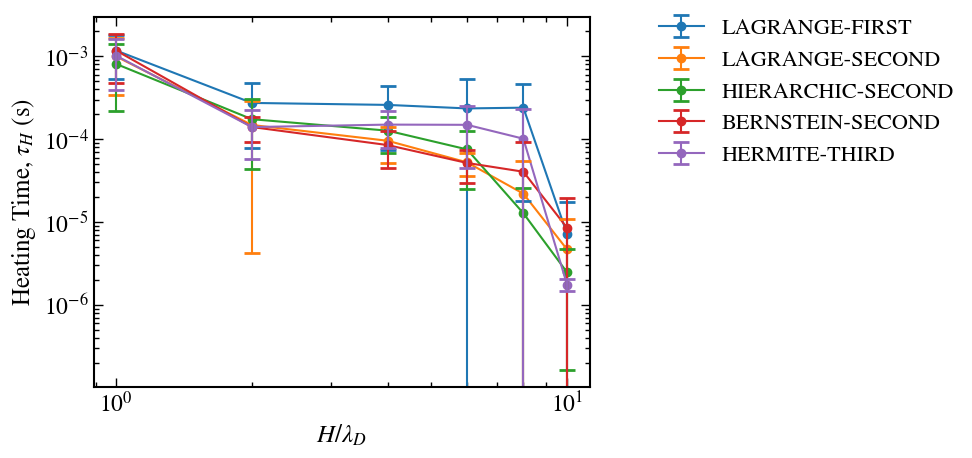

In [439]:
family = ["LAGRANGE", "HIERARCHIC", "BERNSTEIN", "HERMITE"]
# family = ["LAGRANGE", "HIERARCHIC", "BERNSTEIN"]
# family = ["LAGRANGE", "HERMITE"]
# order = ["FIRST", "SECOND"]
order = ["SECOND"]
# order = ["THIRD"]



resolutions = [1, 2, 4, 6, 8, 10]
# resolutions = [0.5]
# resolutions = [0.5]



tau_vals = {}

plot_all = False
calculate_heating = True

for i, fam in enumerate(family):
  if fam == "LAGRANGE":
    order = ["FIRST", "SECOND"]
  else:
    order = ["SECOND"]
  for j, o in enumerate(order):
    if fam == family[-1] and j == 0:
      o = "THIRD"
    if fam == family[-1] and j == 1:
      break
    file_path = f"heating-data-all-particles-eps-real/{fam:s}/{o:s}/h-lambda-"

    tau_key = f"{fam:s}-{o:s}"
    # if fam == "LAGRANGE" and o == "FIRST":
    #   resolutions = [1.0, 2.0, 10.0]
    # else:
    #   resolutions = [1, 2, 4, 6, 8]
    tau_vals[tau_key] = np.zeros((len(resolutions), 10))
    for k, res in enumerate(resolutions):
      if plot_all:
        plt.figure()
        plt.ylim(top=0.5)
        plt.axhline(0.25)
        plt.title(f"{fam:s} - {o:s}: H/$\\lambda = {res:0.1f}$")
      path = f"{file_path:s}{res:0.1f}"
      for r in range(10):
        curr_file = f"{path:s}/trial-{r:d}.csv"
        data = pd.read_csv(curr_file)
        energy = data["mean_electron_energy"][1:].to_numpy()
        time = data["time"][1:].to_numpy()
        energy_increase = abs(energy - energy[0]) / energy


        if calculate_heating:
          after_idx = np.where(energy_increase >= 0.25)[0][0]
          before_idx = after_idx - 1
          t_vals = data["time"][before_idx:after_idx + 1]
          y_vals = energy_increase[before_idx:after_idx + 1]

          tau_vals[tau_key][k][r] = np.interp(0.25, y_vals, t_vals)

        if plot_all:
          plt.plot(time, energy_increase)
          plt.plot(tau_vals[tau_key][k][r], 0.25, '*k')
    if plot_all:
      plt.show()


if calculate_heating:
  fig = plt.figure()
  ax = plt.axes()
  ax.set_yscale("log")
  ax.set_xscale("log")
  plt.xlabel("$H/\\lambda_D$")
  plt.ylabel("Heating Time, $\\tau_H$ (s)")

  for key, tau_h in tau_vals.items():
    mean_tau_h = tau_h.mean(axis=1)
    std_tau_h = tau_h.std(axis=1)
  # for i in range(len(mean_tau_h))
    # if key == f"LAGRANGE-FIRST":
    #   resolutions = [1.0, 2.0, 10.0]
    # else:
    #   resolutions = [1, 2, 4, 6, 8]
    plt.errorbar(resolutions, mean_tau_h, std_tau_h, markersize=6, fmt='o-', capsize=6, capthick=2, barsabove=True, label=f"{key:s}")

  ax.legend(bbox_to_anchor=(1.1, 1.05))
  plt.show()


  family = ["LAGRANGE", "HIERARCHIC", "BERNSTEIN", "HERMITE"]
# family = ["LAGRANGE", "HIERARCHIC", "BERNSTEIN"]
# family = ["LAGRANGE", "HERMITE"]
# order = ["FIRST", "SECOND"]
order = ["SECOND"]
# order = ["THIRD"]


LAGRANGE-FIRST
LAGRANGE-SECOND
HIERARCHIC-SECOND
BERNSTEIN-SECOND
HERMITE-THIRD


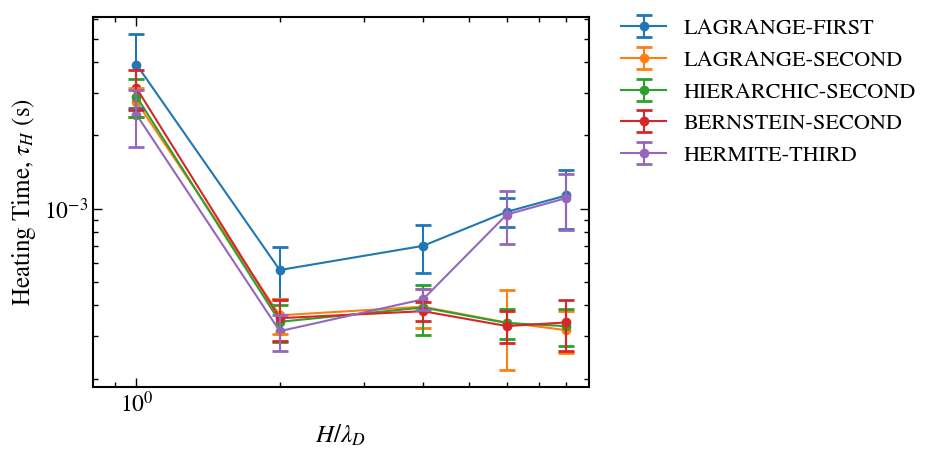

In [449]:


resolutions = [1, 2, 4, 6, 8]
# resolutions = [0.5]
# resolutions = [0.5]


tau_vals = {}

plot_all = False
calculate_heating = True

for i, fam in enumerate(family):
  if fam == "LAGRANGE":
    order = ["FIRST", "SECOND"]
  else:
    order = ["SECOND"]

  for j, o in enumerate(order):
    if fam == family[-1] and j == 0:
      o = "THIRD"
    if fam == family[-1] and j == 1:
      break
    file_path = f"heating-data-eps-real/{fam:s}/{o:s}/h-lambda-"

    tau_key = f"{fam:s}-{o:s}"
    print(tau_key)
    tau_vals[tau_key] = np.zeros((len(resolutions), 10))
    for k, res in enumerate(resolutions):
      if plot_all:
        plt.figure()
        plt.ylim(top=0.5)
        plt.axhline(0.25)
        plt.title(f"{fam:s} - {o:s}: H/$\\lambda = {res:0.1f}$")
      path = f"{file_path:s}{res:0.1f}"
      for r in range(10):
        curr_file = f"{path:s}/trial-{r:d}.csv"
        data = pd.read_csv(curr_file)
        energy = data["mean_energy"][1:].to_numpy()
        time = data["time"][1:].to_numpy()
        energy_increase = abs(energy - energy[0]) / energy


        if calculate_heating:
          after_idx = np.where(energy_increase >= 0.25)[0][0]
          before_idx = after_idx - 1
          t_vals = data["time"][before_idx:after_idx + 1]
          y_vals = energy_increase[before_idx:after_idx + 1]

          tau_vals[tau_key][k][r] = np.interp(0.25, y_vals, t_vals)

        if plot_all:
          plt.plot(time, energy_increase)
          plt.plot(tau_vals[tau_key][k][r], 0.25, '*k')
    if plot_all:
      plt.show()


if calculate_heating:
  fig = plt.figure()
  ax = plt.axes()
  ax.set_yscale("log")
  ax.set_xscale("log")
  plt.xlabel("$H/\\lambda_D$")
  plt.ylabel("Heating Time, $\\tau_H$ (s)")

  for key, tau_h in tau_vals.items():
    mean_tau_h = tau_h.mean(axis=1)
    std_tau_h = tau_h.std(axis=1)
  # for i in range(len(mean_tau_h))
    plt.errorbar(resolutions, mean_tau_h, std_tau_h, markersize=6, fmt='o-', capsize=6, capthick=2, barsabove=True, label=f"{key:s}")

  ax.legend(bbox_to_anchor=(1.7, 1.05))
  plt.show()